In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si

In [2]:
thermocouple_data = np.loadtxt('Thermocouple.csv', skiprows=1, delimiter=',')
v_tc = si.interp1d(thermocouple_data[:,0], thermocouple_data[:,1] * 1e-3)

In [3]:
r_pt = lambda t: 100 * (1 + 0.00385 * t)

In [4]:
r_1 = 115
r_2 = 17.25e3 # 17.4k || 2M or 14.7k + 2.55k
v_ref = 2.5

In [5]:
pt_dr = (r_pt(50)-r_pt(20))/30
tc_dv = 16.1e-6#(v_tc(400)-v_tc(250))/150
i_pt = tc_dv / pt_dr
v_s = i_pt * (r_2 + r_pt(35)) + v_tc(350)
r_3 = r_2 * v_ref / v_s
r_4 = r_2 * r_3 / (r_3 - r_2)
r_3, r_4

(58936.07937259584, 24388.174289319606)

In [6]:
r_3 = 59.0e3
r_4 = 24.3e3
r_s = r_3 * r_4 / (r_3 + r_4)
r_s

17211.284513805524

In [7]:
handle_temps = np.arange(20, 61, 5)
thermocouple_temps = np.arange(0, 510, 10)

r_4pt = r_4 * r_pt(handle_temps) / (r_4 + r_pt(handle_temps))
v_p_a = np.tile(v_ref * r_4pt / (r_4pt + r_3), (thermocouple_temps.shape[0], 1)).transpose()
r_34 = r_3 * r_4 / (r_3 + r_4)
v_p_b = np.outer(r_34 / (r_34 + r_pt(handle_temps)), v_tc(thermocouple_temps))
v_p = v_p_a + v_p_b

In [8]:
v_o = v_p + v_p / r_1 * r_2

In [9]:
tip_temps = np.add.outer(handle_temps, thermocouple_temps)

Text(0.5, 1.0, 'Tip measurement error for given handle temperatures')

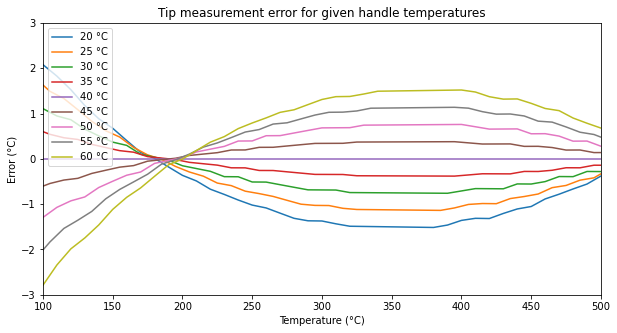

In [11]:
tf_est = si.interp1d(v_o[4,:], tip_temps[4,:], fill_value='extrapolate')
plt.figure(figsize=(10,5))
plt.plot(tip_temps.T, (tip_temps - tf_est(v_o)).T)
plt.ylim(-3, 3)
plt.xlim(100,500)
plt.xlabel('Temperature (°C)')
plt.ylabel('Error (°C)')
plt.legend([f"{t} °C" for t in handle_temps])
plt.title('Tip measurement error for given handle temperatures')

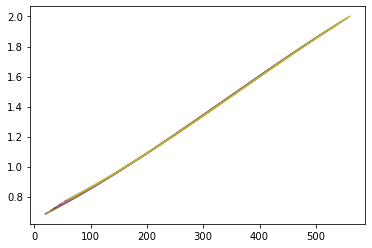

In [12]:
plt.plot(tip_temps.T, v_o.T)

In [313]:
tf_est(2.5)

array(768.71085419)

In [314]:
19.6e3/113

173.4513274336283

In [335]:
150*115

17250